<a href="https://colab.research.google.com/github/Skeletonman59/CSCI166-public/blob/main/Project166_QLearning_finalDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TaxiDriver

## How is the Code meant to run?

The interesting stuff is in "Q-Learning, with updated Gymnasium".
Run all blocks until you reach the hyperparameter blocks.

Steps:
First, install, import, and run all functions.

1.   Run a Hyperparameter block
2.   Run the Q_learning function block
3.   (Optional) Run the testing function to display the TaxiDriver display.
4.   Run the plot code block to see our data in a graph.
5.   Repeat steps above, with different hyperparameters



## Code inspired from Frozen Lake Q-Learning assignment

Doesn't really provide useful information, skip to "Q-Learning, with updated Gymnasium"

In [ ]:
!pip install gymnasium
!pip install swig
!pip install "gymnasium[box2d]"

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_in

In [ ]:
import gym
import numpy as np
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
print(gym.__version__)

0.25.2


In [ ]:
# Alternate function inspired from source
def print_frames(frame, timestamp):
    if isinstance(frame['frame'], np.ndarray):
        # Render the RGB array as an image
        plt.imshow(frame['frame'])
        plt.title("State: %d\nAction: %s\nReward: %d\nEpisodes: %d" %
                  (frame['state'], frame['action'], frame['reward'], frame['episodes']))
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())
        plt.clf()

    time.sleep(timestamp)

In [ ]:
#code for readability: Translates the action number into an actual direction.
def action_language(action):
    if action == 0:
        return "Down"
    elif action == 1:
        return "Up"
    elif action == 2:
        return "Left"
    elif action == 3:
        return "Right"
    elif action == 4:
        return "Pickup"
    elif action == 5:
        return "Dropoff"
    else:
        return "How did you get here???"

In [ ]:
env = gym.make("Taxi-v3", render_mode="ansi")
Q = np.zeros((env.observation_space.n, env.action_space.n))

def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])
def update_q_table(Q, state, action, reward, next_state, alpha, gamma):
  best_next_action = np.argmax(Q[next_state, :])
  td_target = reward + gamma * Q[next_state, best_next_action]
  Q[state, action] += alpha * (td_target - Q[state, action])

def q_learning(env, gamma, alpha, epsilon, num_episodes, epsilon_decay):
  for i in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
      action = choose_action(state, epsilon)
      next_state, reward, done, _ = env.step(action)
      update_q_table(Q, state, action, reward, next_state, alpha, gamma)
      clear_output(wait=True)
      state = next_state
      if epsilon_decay > 0.0:
            epsilon = max(epsilon * epsilon_decay, 0.01)
    print(f"Episode: {i} / {num_episodes}, epsilon: {epsilon}")
  return Q

In [ ]:
Q = q_learning(env, gamma=0.9, alpha=0.1, epsilon=0.1, num_episodes=100, epsilon_decay=0.9995)

print(f"Q-table:\n{Q}")

#import gym is outdated, and has version 0.25.2. import gymnasium as gym is more up to date.

## Q-Learning, with updated gymnasium

This is the final segment

In [1]:
!pip install gymnasium
!pip install swig
!pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376425 sha256=17e02549536e0d54ca89d34b0f444e92e2c7c01641e0ae65e6bcaddd37fb9f5e
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [2]:
import gymnasium as gym
import numpy as np
from IPython.display import clear_output
import random
import time
import matplotlib.pyplot as plt
from os import system

print(gym.__version__)

1.0.0


In [3]:
# Print every frames during the training process
# This function was taken from another source and edited for printing purposes.
def print_frames(frame, timestamp):
    if isinstance(frame['frame'], np.ndarray):
        # Render the RGB array as an image
        plt.imshow(frame['frame'])
        plt.title("State: %d\nAction: %s\nReward: %d\nEpisodes: %d" % (frame['state'], frame['action'], frame['reward'], frame['episodes']))
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())
        plt.clf()
    else:
        print("Render returned non-RGB data.")

    time.sleep(timestamp)

In [4]:
#function for readability: Translates the action number into an actual direction.
def action_language(action):
    if action == 0:
        return "Down"
    elif action == 1:
        return "Up"
    elif action == 2:
        return "Right"
    elif action == 3:
        return "Left"
    elif action == 4:
        return "Pickup"
    elif action == 5:
        return "Dropoff"
    else:
        return "How did you get here???"

In [5]:
env = gym.make("Taxi-v3", render_mode="rgb_array")
Q = np.zeros((env.observation_space.n, env.action_space.n)) #the q table

def choose_action(state, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q[state, :])

def update_q_table(Q, state, action, reward, next_state, alpha, gamma):
  best_next_action = np.argmax(Q[next_state, :]) #oldvalue
  td_target = reward + gamma * Q[next_state, best_next_action] #next_max
  Q[state, action] += alpha * (td_target - Q[state, action]) #qtable update

def q_learning(gamma, alpha, epsilon, num_episodes, epsilon_decay): #the training
    rewards = []  #store rewards for plotting
    for i in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = choose_action(state, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            update_q_table(Q, state, action, reward, next_state, alpha, gamma)
            state = next_state
            total_reward += reward
            if done or truncated:
                break
        rewards.append(total_reward)  # Log the total reward for this episode
        #this part taken from alternate source, however is only used to make
        #printing faster
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i} / {num_episodes}, epsilon: {epsilon}")
        epsilon = max(epsilon * epsilon_decay, 0.01)  # Prevent epsilon from becoming too small

    return Q, rewards  # Return the reward list for plotting


def q_test(Q, num_episodes):
  for i in range(10):
    state, _ = env.reset()
    done = False
    while not done:
      action = np.argmax(Q[state])
      next_state, reward, done, truncated, _ = env.step(action)
      done = done or truncated
      state = next_state
      system('clear')
      frame = {
        'frame': env.render(),
        'state': state,
        'action': action_language(action),
        'reward': reward,
        'episodes': i
      }
      print_frames(frame, 0.1)

### What is my goal here with editing hyperparameters?

Goal: Get a satisfactory reward plot with a smaller episode size.

In [6]:
# initial values
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.9995
min_epsilon = 0.01
num_episodes = 10000
test_episodes = 5

#result: passable, no errors
#problem: big episode value

In [ ]:
#value batch 2, miniscule episode count
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.9995
min_epsilon = 0.01
num_episodes = 1000
test_episodes = 5

#result: terrible outcomes, bad reward states, strange taxi paths


In [ ]:
#value batch 3, poor epsilon value(exploration)
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.01 #exploration rate, randomness
epsilon_decay = 0.9995
min_epsilon = 0.01
num_episodes = 1000
test_episodes = 5


In [ ]:
#value batch 4, similar to batch 1, min epsilon increased. back to exploration
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.9
min_epsilon = 0.05
num_episodes = 1000
test_episodes = 5


In [ ]:
#value batch 5, similar to batch 4, episode size significantly decreased
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.9
min_epsilon = 0.05
num_episodes = 100
test_episodes = 5


In [ ]:
#value batch 6, ep_decay back to 0.995 (really slow), min epsilon increased
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.9995
min_epsilon = 0.01
num_episodes = 1000
test_episodes = 5

In [ ]:
#value batch 6, similar to batch 1 with a smaller epsilon_decay/episode value
alpha = 0.9   #learning rate
gamma = 0.95  #discount factor
epsilon = 0.9 #exploration rate, randomness
epsilon_decay = 0.995
min_epsilon = 0.01
num_episodes = 1000
test_episodes = 5

### Save The Q table and an array of all rewards

In [7]:
Q, rewards = q_learning(gamma, alpha, epsilon, num_episodes, epsilon_decay) #this line trains the Q table

Episode: 9900 / 10000, epsilon: 0.01


### Want to see the taxi in action?

Run this block. Not necessary, this is just to output the TaxiDriver display.


In [ ]:
q_test(Q, test_episodes) #this line tests the Q table, and prints the taxi display
plt.close()
env.close()

### This code block prints a madplotlib plot graph.

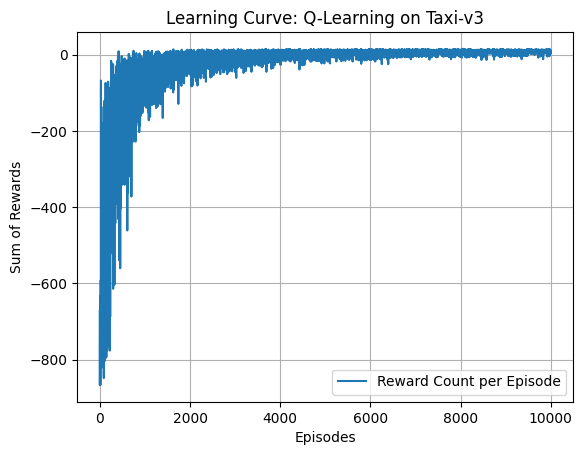

In [8]:
#plot learning curve with rewards array
plt.plot(rewards, label='Reward Count per Episode')
plt.xlabel('Episodes')
plt.ylabel('Sum of Rewards')
plt.title('Learning Curve: Q-Learning on Taxi-v3')
plt.legend()
plt.grid()
plt.show()

### Hyperparameter notes:

***Batch one, 10,000 episodes:*** It is hard to see, but notice the change around the 5000 episode mark. We can assume that our Reward values are mostly positive now, and it stays around there up to the 10000s.

***Batch two, 1000 episodes:*** Most results are negative, so our current hyperparameters are still terrible. Will change the exploration value to 0.1.

***Batch three, 0.1 epsilon value:*** With minimal exploration, most of our results are positive. However, our graph looks quite plain, and somewhat random, ironically. Also notice that the max reward is 15. Expanding our exploration may help in keeping that number high.

***Batch four, smaller decay:*** Converges to positive values quite fast, way before reaching 200 episodes.

***Batch five, 100 episodes:*** The graph is starting to look quite weak. However, we start seeing positive values after 40 episodes, a small dip around 80-85 eposides, then back to positive values. Can it be said that we are converging to a local optima? It's not like we can get anything extraordinarily higher than "20" since the episodes end when the taxi successfully drops off a passenger at a hotel (which is all we want).

***Batch six, more epsilon changes:*** We get a really ugly graph, looks like a huge smudge. This shows us that it is mostly the decay factor that affects this graph. We can say the number of episodes also affects this, because these are the exact same values as batch 1 minus the maximum number of episodes. 0.9995 is in batch one, however the episode value is 10,000. with 1000 episodes, the epsilon value never reaches "0.1".

***Batch seven, 1000 episodes, decay of 0.995:*** By removing one "nine" from the episode decay, we were able to make the graph much more readable, and now the graph converges to a certain point way later within the graph. **Although this batch gives us a suboptimal graph, this batch of parameters gives us the best looking graph,** since we can see how our agent progressively begins to learn what actions to take over time by exploring enough times early, and then converging after around 80% of the way to the maximum amount of episodes.

---

It seems like in the case for TaxiDriver, exploitation may be best? Given that the rewards don't seem to improve even with a bigger episode size.


Why does the plot graph end up looking fuzzy after we get good results? Remember that the taxi and the passenger spawn in different locations each episode. The really high results could be situations where the taxi spawns next to or near the passenger, and the passenger's hotel is the closest possible location to be in. Worst case scenario, the taxi spawns near a hotel in a corner, has to go to a passenger on the other side, and transport them back to that same hospital (resulting in a longer trip, and thus a smaller reward).